## Importing all the neccessary libraries for the EDA

In [49]:
import pandas as pd #data preprocessing
import numpy as np
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
import missingno as msno # missing data visualization
from collections import Counter #
import warnings
warnings.filterwarnings('ignore')

In [50]:
# Loading Dataset 
st = pd.read_csv(r"C:\Users\masha\Downloads\Customer-Churn - Customer-Churn.csv")

In [51]:
st.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
st.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [53]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [54]:
#Dimension of the data
st.shape

(7043, 21)

In [55]:
# checking for the features OR the columns in the dataset
st.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [56]:
# getting the statistical information for of the numerical columns
st.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [57]:
# Checking for Unique values in the Categorical Datasets
for column in st.select_dtypes(include='object').columns:
    print(f"Column: {column}\nUnique values: {st[column].unique()}\n")

Column: customerID
Unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Column: gender
Unique values: ['Female' 'Male']

Column: Partner
Unique values: ['Yes' 'No']

Column: Dependents
Unique values: ['No' 'Yes']

Column: PhoneService
Unique values: ['No' 'Yes']

Column: MultipleLines
Unique values: ['No phone service' 'No' 'Yes']

Column: InternetService
Unique values: ['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity
Unique values: ['No' 'Yes' 'No internet service']

Column: OnlineBackup
Unique values: ['Yes' 'No' 'No internet service']

Column: DeviceProtection
Unique values: ['No' 'Yes' 'No internet service']

Column: TechSupport
Unique values: ['No' 'Yes' 'No internet service']

Column: StreamingTV
Unique values: ['No' 'Yes' 'No internet service']

Column: StreamingMovies
Unique values: ['No' 'Yes' 'No internet service']

Column: Contract
Unique values: ['Month-to-month' 'One year' 'Two year']

Column: PaperlessBilling
Unique values

## Data cleaning


#Data Cleaning 

In [58]:
#In the dataset colunn 19 has a total of 11 missing values 
miss_vals =st.isnull().sum()
miss_vals

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [59]:
st.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
st[st.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [61]:
st= st.dropna()

In [62]:
st.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [63]:
# cross-checking to confirm no null values
st.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [64]:
#duplicating data
data= st.copy()

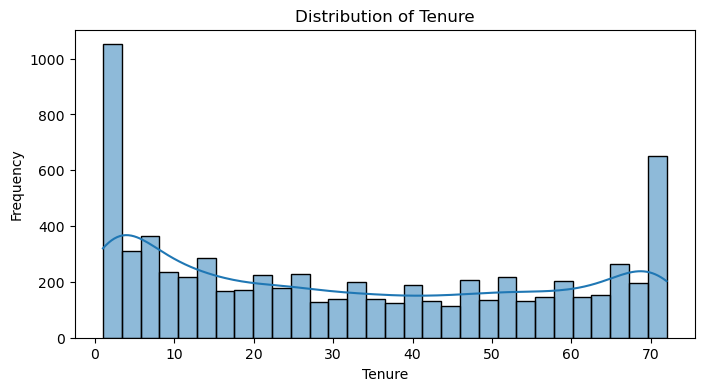

In [65]:
# Univariate analysis - Distribution of 'tenure'
plt.figure(figsize=(8, 4))
sns.histplot(data=st, x='tenure', bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

In [66]:
#Insight
#Tenure is duration for which the customer has been subscribed to the telecom service

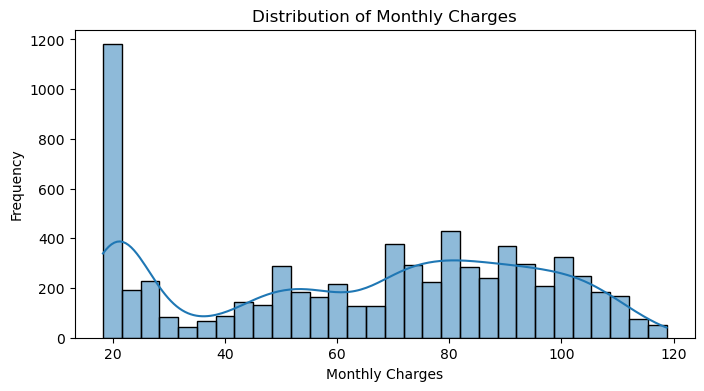

In [67]:
# Univariate analysis - Distribution of 'MonthlyCharges'
plt.figure(figsize=(8, 4))
sns.histplot(data=st, x='MonthlyCharges', bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

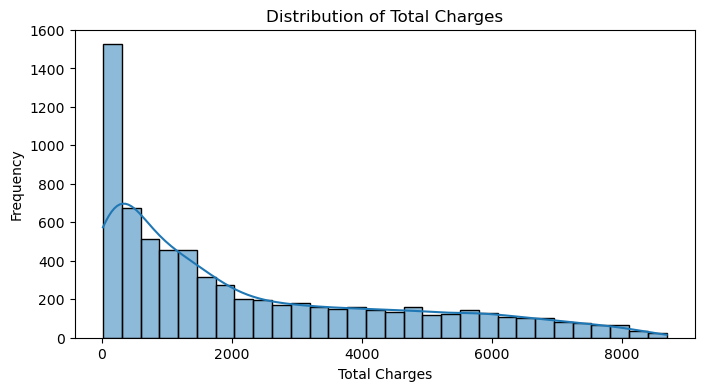

In [68]:
# Univariate analysis - Distribution of 'TotalCharges'
plt.figure(figsize=(8, 4))
sns.histplot(data=st, x='TotalCharges', bins=30, kde=True)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()


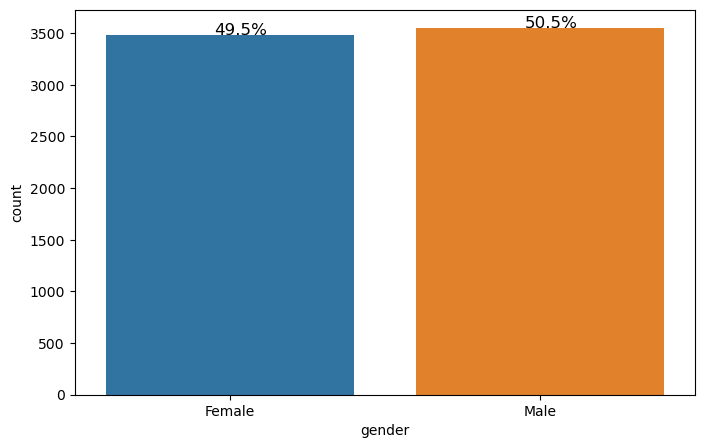

In [69]:

#function that calculates and adds pecentage to graph plots
def perc_plot(plot,feature):
  total = len(feature)
  for p in plot.patches:
    perc = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(perc,(x,y), size=12)
  plt.show()

#univaraite distribution of the gender feature
plt.figure(figsize=(8,5))
ax = sns.countplot(x='gender',data=st)
perc_plot(ax,st.gender)

The even distribution of gender across the customer gradient signifies that ConnecTel's customer base is fairly consistent in terms of gender representation. This gender-neutral distribution suggests that the company's services and offerings resonate with a diverse range of customers, irrespective of gender

# Bivariate analysis 

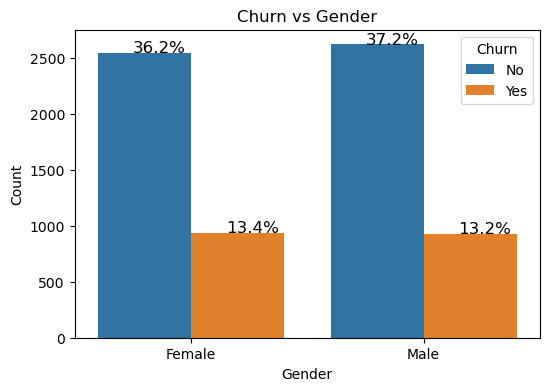

In [70]:
# Bivariate analysis - Churn vs. Gender

plt.figure(figsize=(6, 4))
ax= sns.countplot(data=st, x='gender', hue='Churn')
plt.title('Churn vs Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
perc_plot(ax,st.Churn)
plt.show()



The rate of Churn across gender is nearly equal, with an insignificant difference of 0.2%
This finding indicates that customer churn is not significantly influenced by gender, as both male and female customers seem to exhibit similar churn tendencies

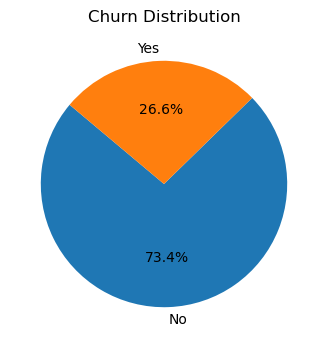

<Figure size 800x600 with 0 Axes>

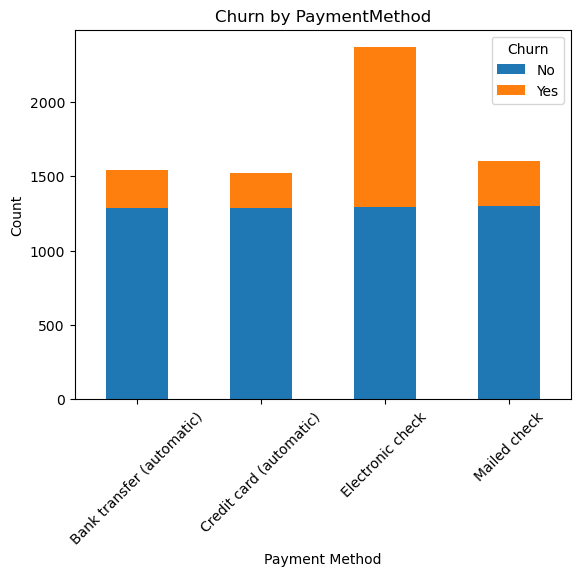

In [71]:

# Bivariate analysis - Churn vs. PaymentMethod
churn_counts = st['Churn'].value_counts()
payment_method_counts = st.groupby('PaymentMethod')['Churn'].value_counts().unstack()

plt.figure(figsize=(8, 4))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')
plt.show()

plt.figure(figsize=(8, 6))
payment_method_counts.plot(kind='bar', stacked=True)
plt.title('Churn by PaymentMethod')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.show()


# Churn distribution
The analysis of ConnectTel's customer data highlights a notable churn distribution rate of 26.6%. This statistic signifies that approximately a quarter of the customer base has shown a tendency to churn, which is a significant aspect of the company's customer dynamics.

# Churn by payment method
The Electronic Check payment method stands out with the highest churn rate, accounting for nearly 3000 instances. 
This substantial churn count associated with electronic check payments suggests that customers who opt for this payment method are more likely to churn. 
This could potentially indicate issues or challenges related to the electronic check payment process;
prompting a higher propensity for customers to switch to competing service providers.

Text(0.5, 1.0, 'Churn by TotalCharges')

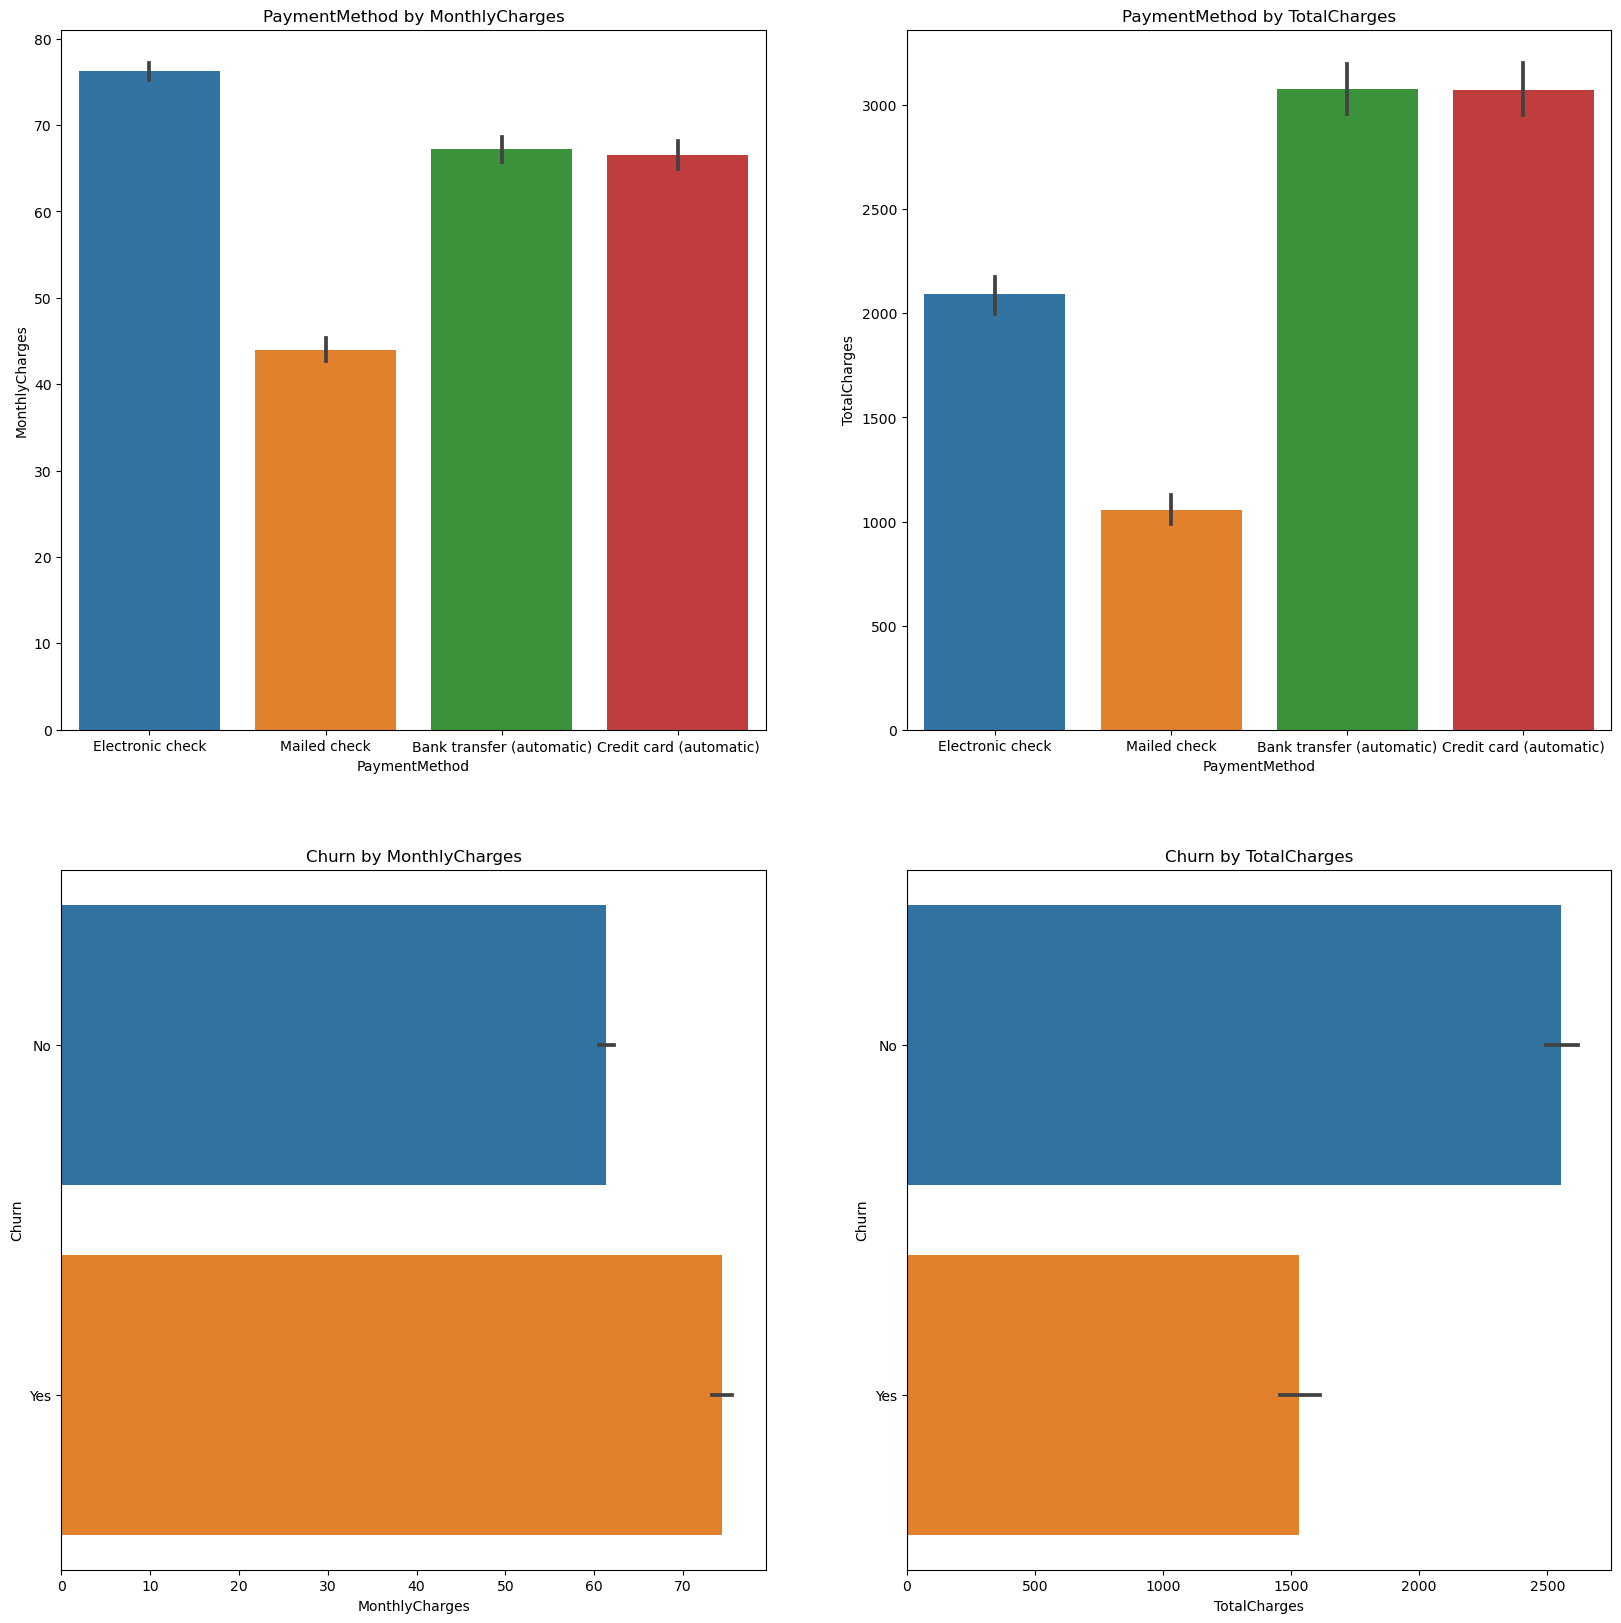

In [72]:
# Bivariant Analysis using subplot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
paymtd_mc = st.groupby('PaymentMethod')['MonthlyCharges'].sum().reset_index()
sns.barplot(x='PaymentMethod', data=st, y='MonthlyCharges', ax=axs[0,0])
axs[0,0].set_title('PaymentMethod by MonthlyCharges')


paymtd_TC= st.groupby('PaymentMethod')['TotalCharges'].sum().reset_index()
sns.barplot(x='PaymentMethod', data=st, y='TotalCharges', ax=axs[0,1])
axs[0,1].set_title('PaymentMethod by TotalCharges')


churn_mc = st.groupby('Churn')['MonthlyCharges'].sum().reset_index()
sns.barplot(y='Churn', data=st, x='MonthlyCharges', ax=axs[1,0])
axs[1,0].set_title('Churn by MonthlyCharges');

paymtd_TC = st.groupby('Churn')['TotalCharges'].sum().reset_index()
sns.barplot(y='Churn', data=st, x='TotalCharges', ax=axs[1,1])
axs[1,1].set_title('Churn by TotalCharges')


Findings shows that, the Electronic Check payment method, despite having the highest average monthly charges, is second in terms of total charges. This could suggest that while customers using electronic checks might have higher monthly charges, their tenure(loyalty) with the company might not be as prolonged as those who prefer bank transfer or credit card payments.this may prove or justifys the higher churn rate of electronic check payment method above

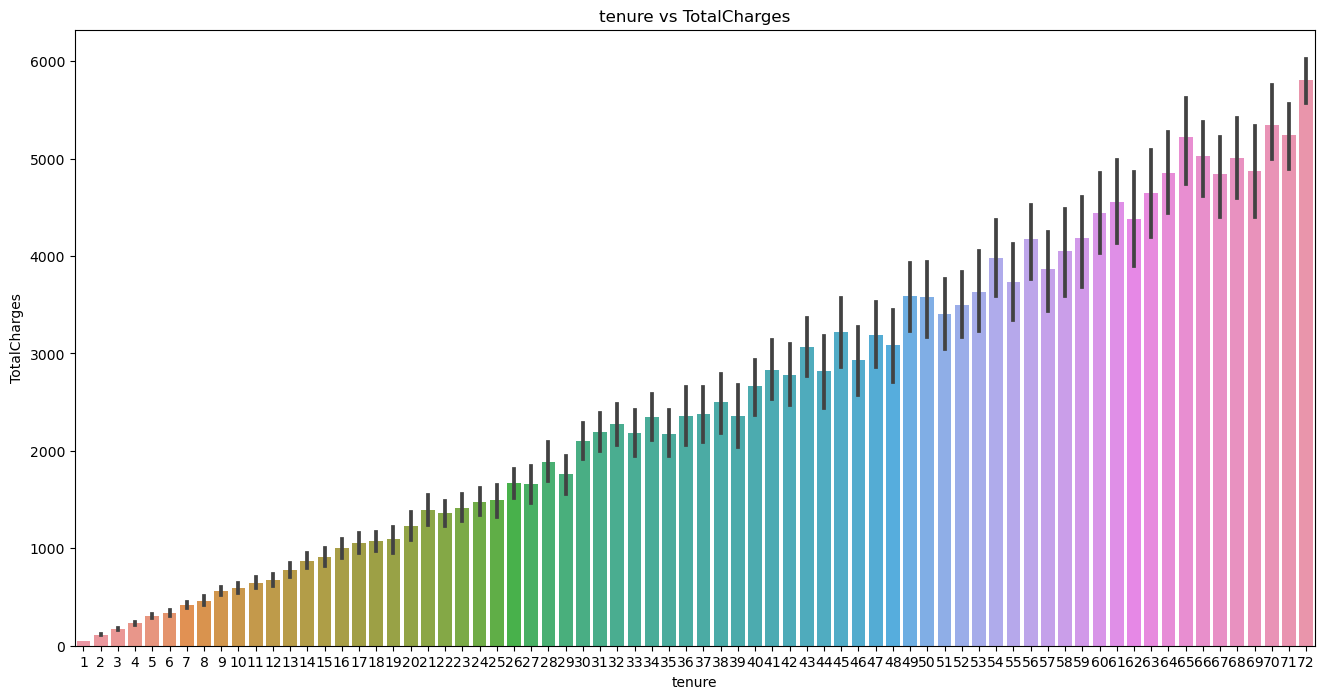

In [73]:
# Bivariate analysis - tenure vs. Total Charges
plt.figure(figsize=(16, 8))
sns.barplot(data=st, x='tenure', y='TotalCharges')
plt.title('tenure vs TotalCharges')
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.show()

This particular plot of total charge by tenure shows a possitive relationship

A positive relationship between these two variables suggests that as the tenure of a customer increases, their total charges also tend to increase
This implies that customers who have been with ConnectTel for a longer period tend to incur higher charges over time. This could be due to their increasing usage of services, additional features, or upgrades. 

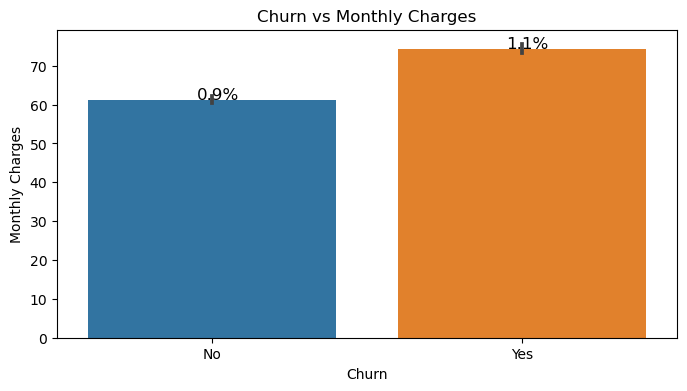

In [74]:
# Bivariate analysis - Churn vs. Monthly Charges
plt.figure(figsize=(8, 4))
ax= sns.barplot(data=st, x='Churn', y='MonthlyCharges')
plt.title('Churn vs Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
perc_plot(ax,st.Churn)
plt.show()


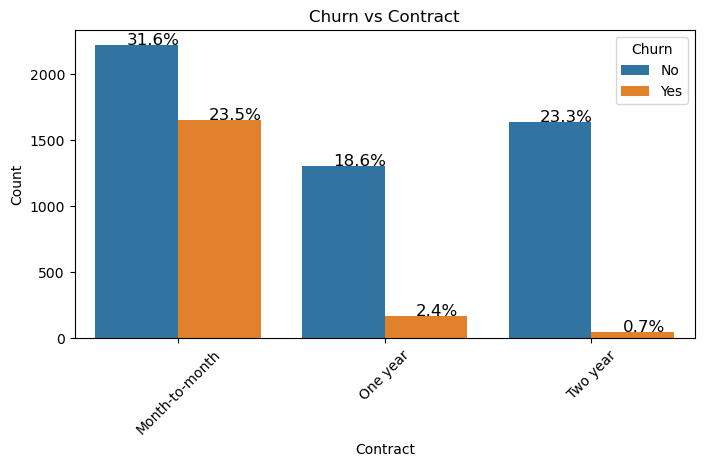

In [75]:
# Bivariate analysis - Churn vs. Contract

plt.figure(figsize=(8, 4))
ax= sns.countplot(data=st, x='Contract', hue='Churn')
plt.title('Churn vs Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=45)
perc_plot(ax,st.Churn)
plt.show()

# Month-to-Month Contract (23.5% Churn Rate):

The relatively higher churn rate for month-to-month contracts indicates that customers with this type of contract are more likely to churn compared to other contract lengths.
This could be attributed to the flexibility that month-to-month contracts offer, allowing customers to easily switch providers or plans without long-term commitments.
Customers might opt for this type of contract if they are uncertain about their future needs or if they prioritize flexibility over cost savings.

# One-Year Contract (2.4% Churn Rate):

The significantly lower churn rate for one-year contracts suggests that customers with this contract type are more committed to staying with ConnectTel.
One-year contracts offer a middle ground between flexibility and commitment, which might attract customers who want some stability without committing to a longer period.
This lower churn rate could also be attributed to potential cost savings associated with longer contracts.

# Two-Year Contract (0.7% Churn Rate):

The very low churn rate for two-year contracts indicates a high level of customer loyalty and commitment to the company.
Customers with two-year contracts are highly invested in ConnectTel's services and are less likely to consider switching providers.
The long-term commitment might be tied to perceived benefits such as lower monthly costs, promotions, or special features.

# Recommendations and Strategies:
Based on this analysis, ConnectTel can consider the following strategies:

Retention Efforts for Month-to-Month Contracts:
Since month-to-month contracts have a higher churn rate, it's crucial to focus on retaining these customers.
Offer incentives for longer-term contracts, such as discounts or additional services, to encourage customers to commit to longer periods.

Promote One-Year Contracts:
Given the relatively low churn rate for one-year contracts, the company can actively promote this option.
Highlight the benefits of a stable service with potential cost savings compared to month-to-month contracts.

Reward and Engage Two-Year Contract Customers:
Customers with two-year contracts are highly loyal. Acknowledge and reward this loyalty through special promotions, loyalty programs, or exclusive features.
Engage with these customers to ensure their ongoing satisfaction and gather feedback for continuous improvement.

# Multivariate analysis

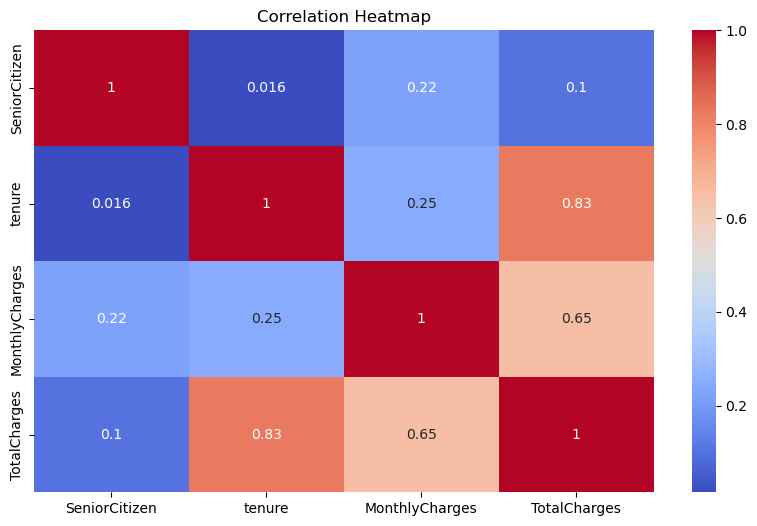

In [76]:
 # Multivariate analysis- Correlation heatmap
correlation_matrix = st.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#Total Charges by Tenure (0.83):
A correlation coefficient of 0.83 indicates a strong positive correlation between total charges and tenure.
This suggests that as the tenure (duration of the customer's subscription) increases, the total charges also tend to increase.
This correlation could be attributed to the fact that longer-tenured customers might have accumulated higher charges due to extended service usage.

#Total Charges by Monthly Charges (0.65):
A correlation coefficient of 0.65 indicates a positive correlation between total charges and monthly charges.
This implies that customers who have higher monthly charges also tend to have higher total charges over time.
This correlation aligns with the general expectation that customers who subscribe to more expensive plans (higher monthly charges) will accumulate higher total charges.

#Monthly Charges by Tenure (0.25):
A correlation coefficient of 0.25 indicates a relatively weak positive correlation between monthly charges and tenure.
This suggests that while there is a positive relationship, it's not very strong.
Customers with longer tenure might be more likely to opt for higher-cost plans (higher monthly charges), but the relationship is not as pronounced.

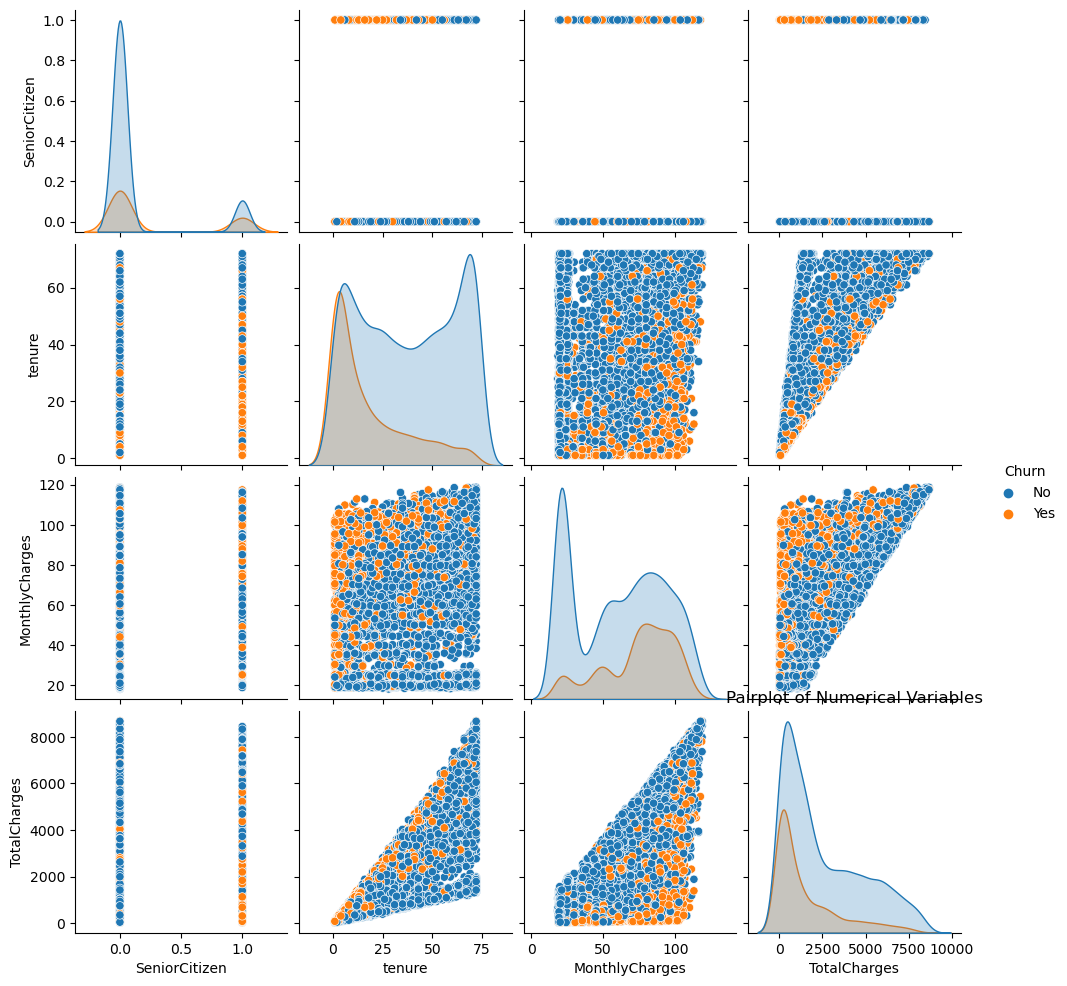

In [77]:
# Multivariate analysis - Pairplot
sns.pairplot(data=st, hue='Churn', diag_kind='kde')
plt.title('Pairplot of Numerical Variables')
plt.show()

This pair plot shows that there is a significantly possitive relationship between Total Charges and Tenure, similar to the findings from the heatmap above. Hence suggesting the dataset is good for regression analysis in the Machine learning phase

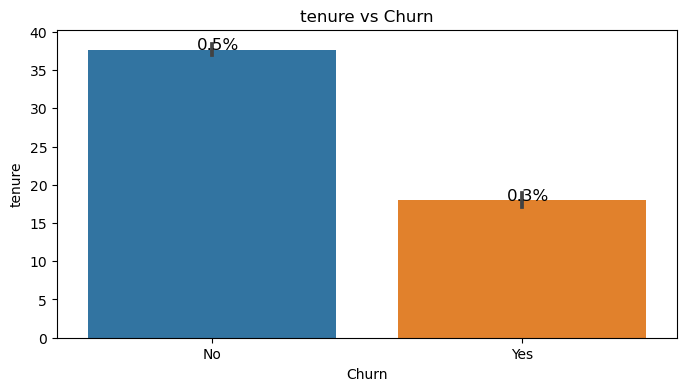

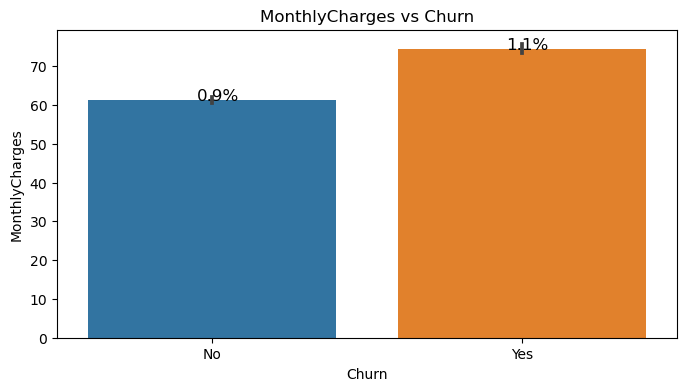

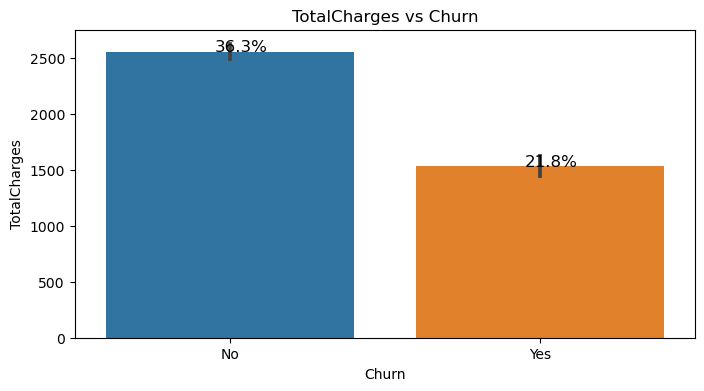

In [78]:
# Explore the relationship between churn and numerical variables
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    ax= sns.barplot(data=st, x='Churn', y=column)
    plt.title(f'{column} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(column)
    perc_plot(ax,st.Churn)
    plt.show()

# Disscussion and Conclusion of the EDA

# Machine Learning (SML)

In [79]:
# Data preprocessing type 2
from sklearn.preprocessing import LabelEncoder


#label Encoding
encoder = LabelEncoder() #method initialization

# looping for columns except target
for c in data.columns[1:]:
    if (data[c].dtype == 'object'):
         data[c] = encoder.fit_transform(data[c])
    else: 
        data[c] = data[c]
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [80]:
data.drop('customerID', axis= 1, inplace= True)

In [81]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [82]:
# segment data
x = data.drop("Churn",axis=1)
y= data['Churn']

In [83]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [84]:
#scalling  data using standard scaler from SciKit.Learn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [85]:
scaled_x

array([[-1.00943013, -0.44032709,  1.03561683, ...,  0.39980518,
        -1.16169394, -0.99419409],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  1.33663626,
        -0.26087792, -0.17373982],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  1.33663626,
        -0.36392329, -0.95964911],
       ...,
       [-1.00943013, -0.44032709,  1.03561683, ...,  0.39980518,
        -1.17000405, -0.85451414],
       [ 0.99065797,  2.27103902,  1.03561683, ...,  1.33663626,
         0.31916782, -0.87209546],
       [ 0.99065797, -0.44032709, -0.9656081 , ..., -1.47385696,
         1.35793167,  2.01234407]])

In [86]:
# spliting datasets into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3, random_state=0)


In [87]:
x_train

array([[-1.00943013,  2.27103902,  1.03561683, ..., -0.53702589,
         0.97068051,  1.39223303],
       [ 0.99065797, -0.44032709, -0.9656081 , ..., -0.53702589,
         0.40226893,  1.2087211 ],
       [ 0.99065797, -0.44032709,  1.03561683, ..., -0.53702589,
         0.16293773, -0.77964462],
       ...,
       [ 0.99065797, -0.44032709,  1.03561683, ..., -0.53702589,
         1.36790381,  1.34937167],
       [-1.00943013, -0.44032709,  1.03561683, ..., -0.53702589,
         0.5202725 , -0.50571133],
       [ 0.99065797, -0.44032709, -0.9656081 , ..., -0.53702589,
         1.32469123,  2.03232986]])

## Building Base Model

# Using Logistic Regression in a single code

In [88]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [89]:
Predic= logreg.predict(x_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, Predic))
print("Precision:", precision_score(y_test, Predic))
print("Recall:", recall_score(y_test, Predic))
print ("F1-score:", f1_score(y_test, Predic)) 
print ("AUC-ROC:", roc_auc_score(y_test, Predic))

Logistic Regression
Accuracy: 0.7990521327014218
Precision: 0.6433260393873085
Recall: 0.5297297297297298
F1-score: 0.5810276679841897
AUC-ROC: 0.7124532893021639


# Using the 8 Classifier Algorithim
# including logistic regression for cross-check

In [90]:
#Data Pre-Processsing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries
from sklearn.linear_model import SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

!pip install xgboost
from xgboost import XGBClassifier 
from sklearn.svm import LinearSVC, SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import confusion_matrix

In [91]:
classifiers =[ [XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbohs'],
               [SGDClassifier(),'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(),'Naive Bayes'],
               [DecisionTreeClassifier(random_state= 42), 'Descision Tree'],
               [LogisticRegression(), 'Logistic Regression'],
             ]

In [92]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbohs'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeClassif

In [93]:
acc_list = {}
precision_list ={}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit (x_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(x_test)
    
    a_score = accuracy_score (y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) +'%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) +'%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) +'%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) +'%'])
                             
    
    if model_name != classifiers[-1][1]:
       print("")

In [94]:
acc_list

{'XGB Classifier': ['78.15%'],
 'Random Forest': ['78.58%'],
 'K-Nearest Neighbohs': ['75.97%'],
 'SGD Classifier': ['78.96%'],
 'SVC': ['79.29%'],
 'Naive Bayes': ['75.5%'],
 'Descision Tree': ['72.84%'],
 'Logistic Regression': ['79.91%']}

In [95]:
print('Accuracy_Score')
sl = pd.DataFrame (acc_list)
sl.head()

Accuracy_Score


,XGB Classifier,Random Forest,K-Nearest Neighbohs,SGD Classifier,SVC,Naive Bayes,Descision Tree,Logistic Regression
0,78.15%,78.58%,75.97%,78.96%,79.29%,75.5%,72.84%,79.91%


In [96]:
print('precision_Score')
sl = pd.DataFrame (precision_list)
sl.head()

precision_Score


,XGB Classifier,Random Forest,K-Nearest Neighbohs,SGD Classifier,SVC,Naive Bayes,Descision Tree,Logistic Regression
0,60.31%,62.23%,54.76%,59.62%,65.45%,52.42%,48.47%,64.33%


In [97]:
print('recall_list')
sl = pd.DataFrame (recall_list)
sl.head()

recall_list


,XGB Classifier,Random Forest,K-Nearest Neighbohs,SGD Classifier,SVC,Naive Bayes,Descision Tree,Logistic Regression
0,49.55%,47.21%,49.73%,61.98%,45.05%,74.23%,51.53%,52.97%


In [98]:
print('roc_list')
sl = pd.DataFrame (roc_list)
sl.head()

roc_list


,XGB Classifier,Random Forest,K-Nearest Neighbohs,SGD Classifier,SVC,Naive Bayes,Descision Tree,Logistic Regression
0,68.95%,68.49%,67.53%,73.5%,68.28%,75.09%,65.99%,71.25%


# Confusion matrix 

In [99]:
#visualizing confusion matrix


from sklearn.metrics import confusion_matrix

classifiers = [
    [XGBClassifier(), 'XGB Classifier'],
    [RandomForestClassifier(), 'Random Forest'],
    [KNeighborsClassifier(), 'K-Nearest Neighbohs'],
    [SGDClassifier(), 'SGD Classifier'],
    [SVC(), 'SVC'],
    [GaussianNB(), 'Naive Bayes'],
    [DecisionTreeClassifier(random_state=42), 'Descision Tree'],
    [LogisticRegression(), 'Logistic Regression'],
]

acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

confusion_matrices = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]

    pred = model.predict(x_test)

    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)

    acc_list[model_name] = [str(round(a_score * 100, 2)) + '%']
    precision_list[model_name] = [str(round(p_score * 100, 2)) + '%']
    recall_list[model_name] = [str(round(r_score * 100, 2)) + '%']
    roc_list[model_name] = [str(round(roc_score * 100, 2)) + '%']

    confusion_matrices[model_name] = confusion_matrix(y_test, pred)

    if model_name != classifiers[-1][1]:
        print("")

# Print confusion matrices
for model_name, matrix in confusion_matrices.items():
    print(f"Confusion Matrix for {model_name}:")
    print(matrix)
    print("")
    
    








Confusion Matrix for XGB Classifier:
[[1374  181]
 [ 280  275]]

Confusion Matrix for Random Forest:
[[1399  156]
 [ 293  262]]

Confusion Matrix for K-Nearest Neighbohs:
[[1327  228]
 [ 279  276]]

Confusion Matrix for SGD Classifier:
[[1322  233]
 [ 230  325]]

Confusion Matrix for SVC:
[[1423  132]
 [ 305  250]]

Confusion Matrix for Naive Bayes:
[[1181  374]
 [ 143  412]]

Confusion Matrix for Descision Tree:
[[1251  304]
 [ 269  286]]

Confusion Matrix for Logistic Regression:
[[1392  163]
 [ 261  294]]



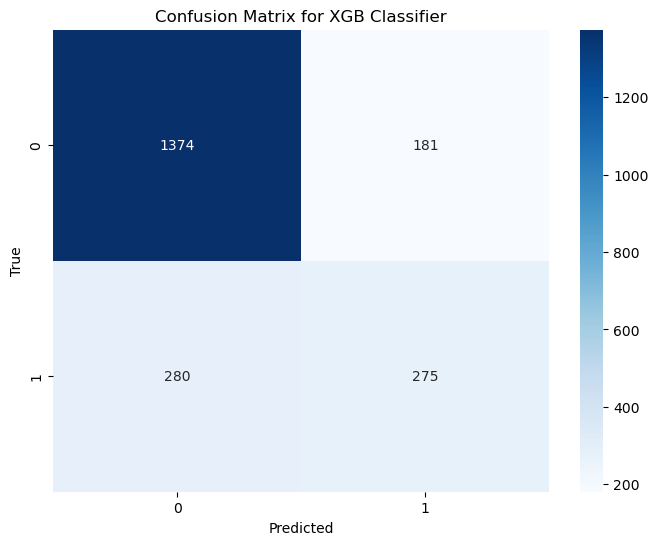

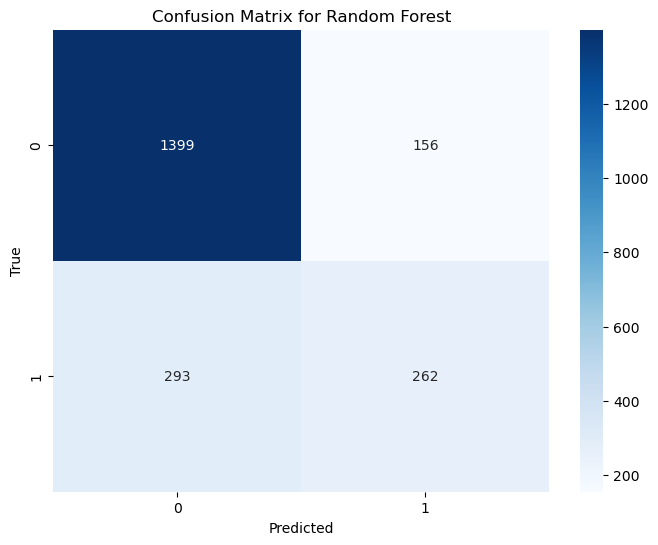

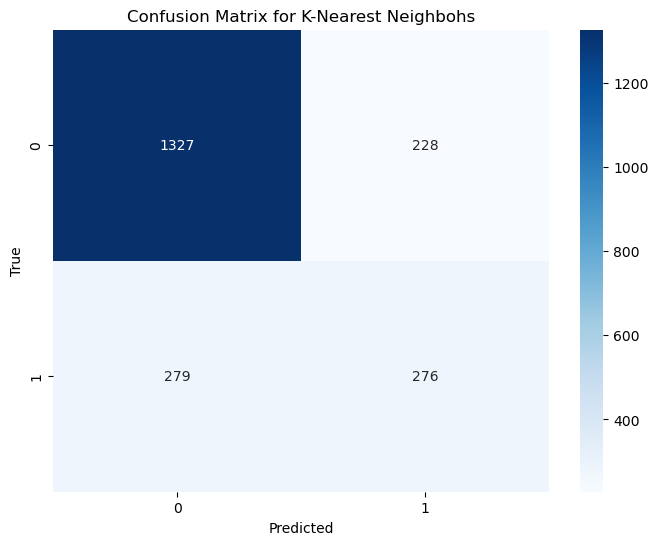

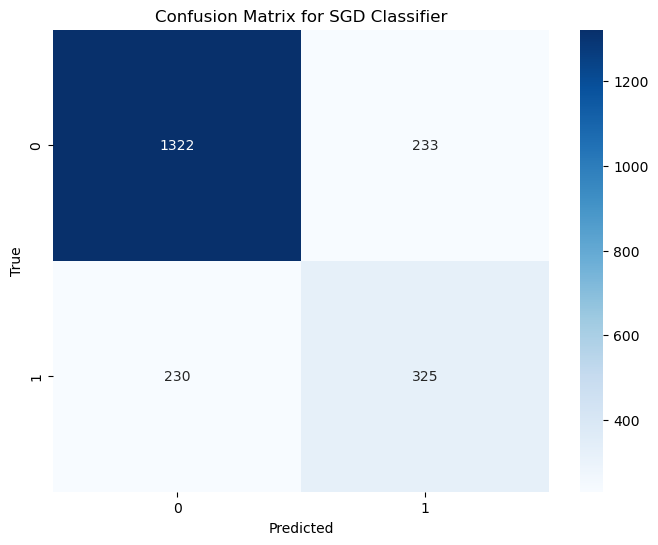

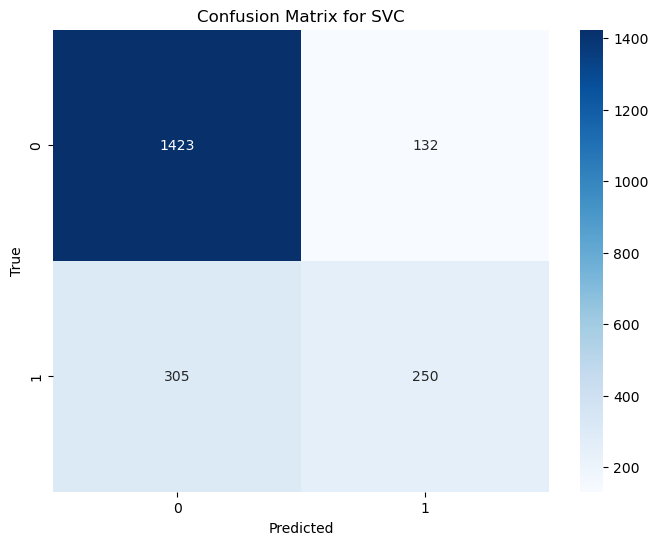

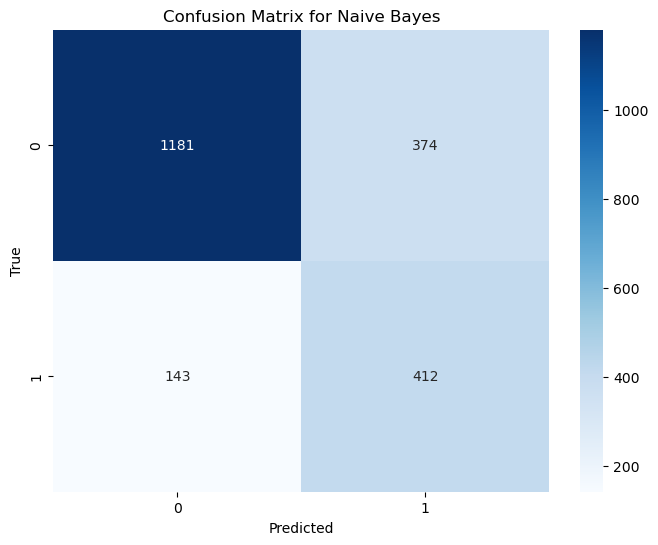

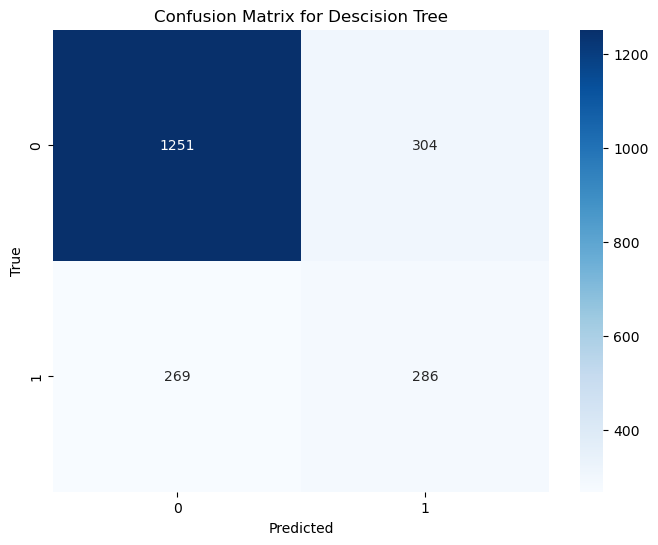

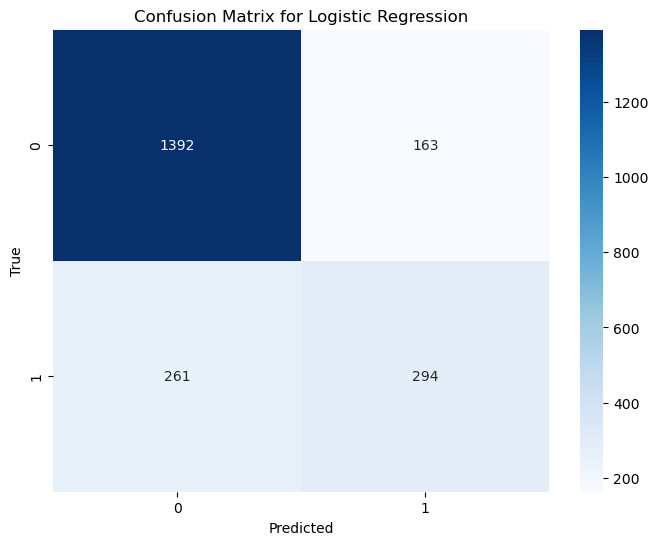

In [100]:
# Plot confusion matrix heatmaps
for model_name, matrix in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Explaining the three best model 


# The XGB, Random Forest and Logistic Regression Classifier

# Disscusion and Justification for choosing Logistic Regression Model